# **1. Linear Regression**

In [ ]:
#import thu vien
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Q1: Custom Linear Regression**

In [ ]:
class CustomLinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.01, num_epochs=10000):
        self.num_samples = X_data.shape[0]
        self.X_data = np.c_[np.ones((self.num_samples, 1)), X_data]
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_features = self.X_data.shape[1]

        # Initial weights
        self.theta = np.random.randn(self.X_data.shape[1], 1)
        self.losses = []

    def compute_loss(self, y_pred, y_target):
        loss = (y_pred-y_target)**2
        loss = np.mean(loss)
        return loss

    def predict(self, X_data):
        if X_data.shape[1] == self.num_features:
            y_pred = X_data.dot(self.theta)
        else:
            X_data = np.c_[np.ones((X_data.shape[0], 1)), X_data]
            y_pred = X_data.dot(self.theta)
        return y_pred

    def fit(self):
        for epoch in range(self.num_epochs):
            # predict
            y_pred = self.predict(self.X_data)

            # compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)

            # compute gradient
            loss_grd = 2*(y_pred-self.y_target)/self.num_samples
            gradients = self.X_data.T.dot(loss_grd)

            # update weight
            self.theta = self.theta - self.learning_rate*gradients

            if (epoch % 50) == 0:
                print(f'Epoch: {epoch} - Loss: {loss}')

        return {
            'loss': sum(self.losses)/len(self.losses),
            'weight': self.theta
        }

## **Q3: def r2_score** D

In [ ]:
def r2score(y_pred, y_target):
  rss = np.sum((y_pred-y_target)**2)
  tss = np.sum((y_target-np.mean(y_target))**2)
  r2 = 1-(rss/tss)
  return r2

## **Q4: test r2score**

In [ ]:
#case 1
y_pred = np.array([1,2,3,4,5])
y_target = np.array([1,2,3,4,5])
r2_1 = r2score(y_pred, y_target)
print('Case 1: ', r2_1)
#case 2
y_pred = np.array([1,2,3,4,5])
y_target = np.array([3,5,5,2,4])
r2_2 = r2score(y_pred, y_target)
print('Case 2: ',r2_2)

Case 1:  1.0
Case 2:  -2.235294117647059


## **2. Polynomial Regression**

In [ ]:
#Examples
def polynomial_regression(X, degree=2):
  X_new = X
  for d in range(2, degree+1):
    X_new = np.c_[X_new, X**d]
  return X_new

X=np.array([[1],[2],[3]])
X_new = polynomial_regression(X, degree=2)
print(X_new)

[[1 1]
 [2 4]
 [3 9]]


In [ ]:
#Example2
X = np.array([[1, 2],
              [2, 3],
              [3, 4]])

degree = 2

X_poly = np.array([[1, 1, 2, 4],
                  [2, 4, 3, 9],
                  [3, 9, 4, 16]])

def create_polynomial_features(X, degree=2):
  X_mem = []
  for X_sub in X.T:
      X_sub = X_sub.T
      X_new = X_sub
      for d in range(2, degree+1):
          X_new = np.c_[X_new, X_sub**d]
      X_mem.append(X_new.T)
  return np.array(X_mem).T

# **3. SALES PREDICTION**

In [ ]:
!gdown 1A8kK0IEsT3w8htzU18ihFr5UV-euhquC

Downloading...
From: https://drive.google.com/uc?id=1A8kK0IEsT3w8htzU18ihFr5UV-euhquC
To: /content/SalesPrediction.csv
100% 206k/206k [00:00<00:00, 29.2MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv('./SalesPrediction.csv')
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [ ]:
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [ ]:
#vectorization Influencer column by One Hot Encoding
df = pd.get_dummies(df)
df

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False
...,...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,False,False,True,False
4568,71.0,20.610685,6.545573,249.101915,False,False,False,True
4569,44.0,19.800072,5.096192,163.631457,False,False,True,False
4570,71.0,17.534640,1.940873,253.610411,True,False,False,False


In [ ]:
df.isnull().sum()

,0
TV,10
Radio,4
Social Media,6
Sales,6
Influencer_Macro,0
Influencer_Mega,0
Influencer_Micro,0
Influencer_Nano,0


In [ ]:
df = df.fillna(0)

In [ ]:
df.isnull().sum()

,0
TV,0
Radio,0
Social Media,0
Sales,0
Influencer_Macro,0
Influencer_Mega,0
Influencer_Micro,0
Influencer_Nano,0


In [ ]:
df.mean()

,0
TV,53.948600
Radio,18.144468
Social Media,3.319594
Sales,192.214021
Influencer_Macro,0.245407
Influencer_Mega,0.253281
Influencer_Micro,0.252187
Influencer_Nano,0.249125


In [ ]:
df = df.fillna(df.mean())

In [ ]:
df.corr()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
TV,1.000000,0.860518,0.522565,0.988570,0.018567,-0.012019,-0.004298,-0.002073
Radio,0.860518,1.000000,0.604450,0.863790,0.009486,-0.004108,0.003270,-0.008591
Social Media,0.522565,0.604450,1.000000,0.526777,0.010449,0.012691,-0.012148,-0.010959
Sales,0.988570,0.863790,0.526777,1.000000,0.019709,-0.012167,-0.003555,-0.003807
Influencer_Macro,0.018567,0.009486,0.010449,0.019709,1.000000,-0.332131,-0.331171,-0.328482
Influencer_Mega,-0.012019,-0.004108,0.012691,-0.012167,-0.332131,1.000000,-0.338211,-0.335465
Influencer_Micro,-0.004298,0.003270,-0.012148,-0.003555,-0.331171,-0.338211,1.000000,-0.334495
Influencer_Nano,-0.002073,-0.008591,-0.010959,-0.003807,-0.328482,-0.335465,-0.334495,1.000000


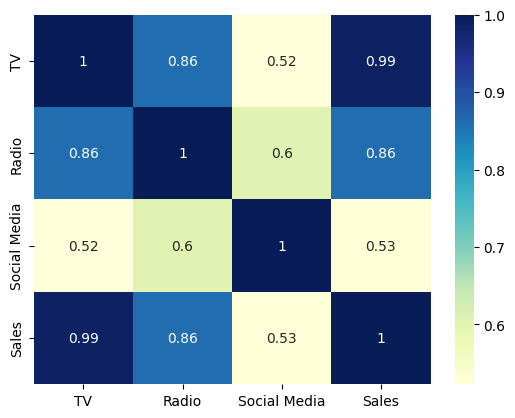

In [ ]:
new_df = df[['TV', 'Radio', 'Social Media', 'Sales']]
sns.heatmap(new_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

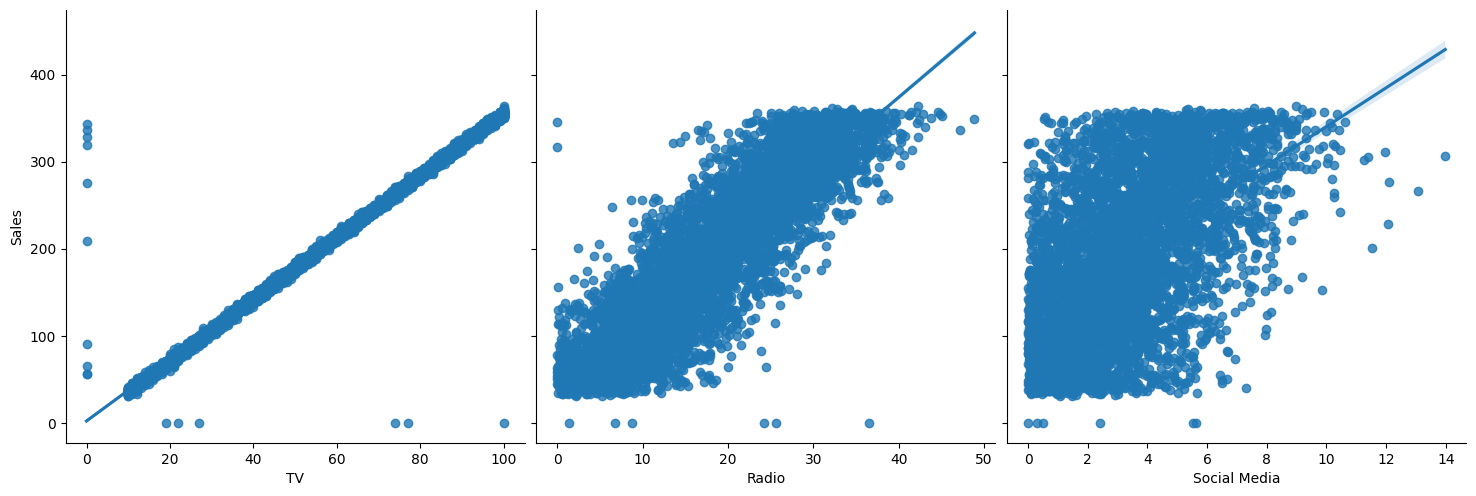

In [ ]:
sns.pairplot(data = df,
    x_vars = ['TV', 'Radio', 'Social Media'],
    y_vars = 'Sales',
    height = 5,
    kind = 'reg'
)
plt.show()

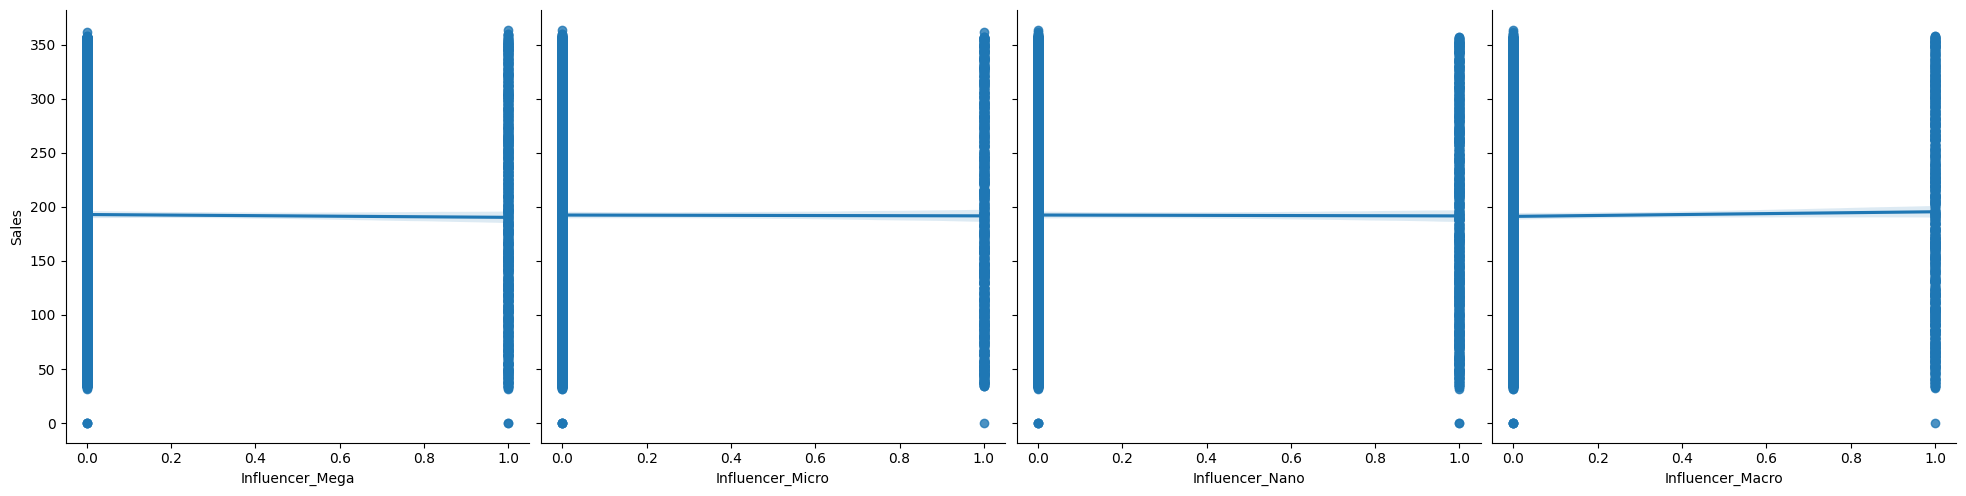

In [ ]:
sns.pairplot(data = df,
    x_vars = ['Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano', 'Influencer_Macro'],
    y_vars = 'Sales',
    height = 5,
    kind = 'reg'
)
plt.show()

In [ ]:
df.columns

Index(['TV', 'Radio', 'Social Media', 'Sales', 'Influencer_Macro',
       'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano'],
      dtype='object')

## Get Features

In [ ]:
X = df[['TV', 'Radio', 'Social Media', 'Influencer_Macro', 'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano']]
X

,TV,Radio,Social Media,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,False,True,False,False
1,13.0,9.237765,2.409567,False,True,False,False
2,41.0,15.886446,2.913410,False,True,False,False
3,83.0,30.020028,6.922304,False,True,False,False
4,15.0,8.437408,1.405998,False,False,True,False
...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,False,False,True,False
4568,71.0,20.610685,6.545573,False,False,False,True
4569,44.0,19.800072,5.096192,False,False,True,False
4570,71.0,17.534640,1.940873,True,False,False,False


In [ ]:
y = df[['Sales']]
y

,Sales
0,54.732757
1,46.677897
2,150.177829
3,298.246340
4,56.594181
...,...
4567,94.685866
4568,249.101915
4569,163.631457
4570,253.610411


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
X_train.shape, y_train.shape

((3063, 7), (3063, 1))

In [ ]:
X_test.shape, y_test.shape

((1509, 7), (1509, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)

In [ ]:
scaler.mean_

array([53.9970617 , 18.22209011,  3.33487105,  0.24779628,  0.25138753,
        0.25008162,  0.25073457])

In [ ]:
scaler.scale_


array([26.24285095,  9.6336957 ,  2.21929717,  0.43173288,  0.43381083,
        0.43305981,  0.43343598])

In [ ]:
X_test_processed = scaler.fit_transform(X_test)

In [ ]:
X_train_processed

array([[ 0.34306251, -0.39269809, -0.17117575, ..., -0.57948652,
         1.73167391, -0.57848122],
       [-0.19041611, -0.28821416, -1.47454833, ...,  1.72566569,
        -0.57747593, -0.57848122],
       [-0.41904981, -1.07312224, -0.55726535, ..., -0.57948652,
        -0.57747593,  1.72866459],
       ...,
       [-1.6003239 , -1.72760008,  0.58703816, ..., -0.57948652,
        -0.57747593,  1.72866459],
       [-0.57147227, -0.9126861 , -1.22457248, ..., -0.57948652,
         1.73167391, -0.57848122],
       [-1.25737336, -1.45632493, -1.04684805, ..., -0.57948652,
         1.73167391, -0.57848122]])

In [ ]:
X_test_processed

array([[-0.33831381, -0.08777243, -0.8285062 , ..., -0.58831925,
         1.70271102, -0.57097333],
       [ 0.77025605,  1.17793463, -0.43356804, ..., -0.58831925,
        -0.58729872,  1.75139529],
       [ 1.15252152,  1.04880432,  1.0942858 , ...,  1.69975741,
        -0.58729872, -0.57097333],
       ...,
       [ 0.96138879,  1.12379052,  1.09726708, ...,  1.69975741,
        -0.58729872, -0.57097333],
       [-0.4147669 , -0.29521947,  1.23016878, ...,  1.69975741,
        -0.58729872, -0.57097333],
       [-0.91171201, -1.21177433, -0.30938743, ...,  1.69975741,
        -0.58729872, -0.57097333]])

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
linear_model = CustomLinearRegression(X_train_processed, y_train, learning_rate=0.1, num_epochs=250)
linear_model.fit()

Epoch: 0 - Loss: 46270.059530019236
Epoch: 50 - Loss: 235.3487913163927
Epoch: 100 - Loss: 213.6736219035223
Epoch: 150 - Loss: 212.24665012793358
Epoch: 200 - Loss: 212.1526399403933


{'loss': 716.1828705264616,
 'weight': array([[192.76209705],
        [ 86.01160815],
        [  6.91901015],
        [  0.207538  ],
        [ -0.27385696],
        [ -0.34465152],
        [ -0.39285946],
        [ -0.61077811]])}

In [ ]:
preds = linear_model.predict(X_test_processed)

In [ ]:
preds[:5]

array([[162.92064383],
       [266.591125  ],
       [299.52388938],
       [301.18710909],
       [ 73.35360458]])

In [ ]:
r2_score(y_test, preds)

0.981945424132257

## **SKLearn - LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_processed, y_train)

LinearRegression()

In [ ]:
preds = linear_model.predict(X_test_processed)
r2_score(y_test, preds)

0.9819627286111282

## **SKLearn - PolynomialRegression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train_processed)

In [ ]:
X_test_poly = poly_features.transform(X_test_processed)

In [ ]:
X_train_poly.shape

(3063, 120)

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
linear_model = CustomLinearRegression(X_train_poly, y_train, learning_rate=0.1, num_epochs=200)
linear_model.fit()

Epoch: 0 - Loss: 44663.62257955655
Epoch: 50 - Loss: 1.9484451268525106e+98
Epoch: 100 - Loss: 4.271332725167818e+192
Epoch: 150 - Loss: 9.363508880827943e+286


{'loss': inf,
 'weight': array([[-1.95440954e+188],
        [-1.95440954e+188],
        [-6.61409288e+188],
        [-7.26159129e+188],
        [-7.29876963e+188],
        [-1.59935362e+187],
        [ 1.12482044e+187],
        [-4.20511615e+187],
        [ 4.66874274e+187],
        [-3.48470140e+188],
        [-3.71523683e+188],
        [-4.61605909e+188],
        [ 9.87515180e+186],
        [ 5.90194679e+186],
        [-3.94565473e+187],
        [ 2.36789038e+187],
        [-4.65788392e+188],
        [-5.68192711e+188],
        [ 1.69243988e+187],
        [-1.48903717e+186],
        [-4.26246141e+187],
        [ 2.72200487e+187],
        [-9.61897705e+188],
        [ 1.52268506e+187],
        [ 7.22667046e+186],
        [-5.60828059e+187],
        [ 3.36341933e+187],
        [-2.14126718e+188],
        [ 6.78158208e+187],
        [ 9.81496922e+187],
        [ 4.73463699e+187],
        [-1.82548496e+188],
        [ 8.32747799e+187],
        [ 3.19545110e+187],
        [-2.43976320e+18

In [ ]:
preds = linear_model.predict(X_test_poly)
r2_score(y_test, preds)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1220: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)


-inf

In [ ]:
preds = linear_model.predict(X_test_poly)
r2_score(y_test, preds)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1220: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)


-inf

In [ ]:
preds[:5]

array([[ 2.88300874e+189],
       [-1.26892116e+190],
       [-4.09718630e+190],
       [-2.22470784e+191],
       [ 1.76474912e+190]])

In [ ]:
y_test[:5]

,Sales
3235,157.656160
1912,264.592233
3656,298.882343
2772,298.639410
130,80.940725


In [ ]:
preds = linear_model.predict(X_test_poly)
r2_score(y_test, preds)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1220: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)


-inf